In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

importing necessary libraries

In [2]:
import cv2
import matplotlib.pyplot as plt
import requests
import numpy as np

**Basic Image operations**

As a basic image processing, we can read an image, understand its properties and perform a few basic operations on it. These operations can help us understand the formation of an image and perform the basic modifications to it. Let’s start with a few basic but important image processing steps.

In [3]:
req = requests.get('https://analyticsindiamag.com/wp-content/uploads/2022/06/taj-1.jpeg')
arr = np.asarray(bytearray(req.content), dtype=np.uint8)
img = cv2.imdecode(arr, -1) # 'Load it as it is
#img = cv2.imread('cats image.jpeg')

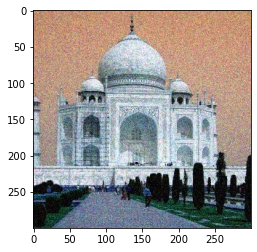

In [4]:
plt.imshow(img)

Let’s see how the values of each pixel are given whether they are in the range of 0 to 1 or 0 to 255.



In [5]:
img

array([[[178, 134, 105],
        [169, 124,  97],
        [197, 147, 127],
        ...,
        [189, 127, 116],
        [171, 109,  99],
        [198, 135, 127]],

       [[185, 136, 110],
        [198, 148, 125],
        [168, 117,  97],
        ...,
        [192, 135, 114],
        [191, 133, 114],
        [208, 152, 135]],

       [[182, 125, 104],
        [203, 146, 125],
        [206, 150, 131],
        ...,
        [168, 123,  86],
        [173, 128,  91],
        [218, 174, 137]],

       ...,

       [[  0,   8,   0],
        [  4,  15,   7],
        [ 10,  20,  14],
        ...,
        [ 16,  51,  41],
        [ 27,  62,  52],
        [  3,  40,  30]],

       [[  1,  18,   7],
        [ 18,  35,  24],
        [ 23,  40,  31],
        ...,
        [ 17,  43,  37],
        [ 32,  58,  52],
        [  6,  32,  26]],

       [[ 12,  34,  22],
        [ 35,  57,  45],
        [ 41,  60,  51],
        ...,
        [ 44,  64,  59],
        [ 64,  85,  82],
        [ 43,  64,  61]]

As we can see the pixel values are ranging between 0 to 255. Let’s check the shape of the image  


In [6]:
img.shape

(300, 300, 3)

As we can see in the above tuple, the 0th index represents the height of the image’s pixel matrix, the  1st index represents the width and the last 2nd index represents the colour channel. 3 means that the image is 3 channels and it is a colour channel or RGB image. 

Let’s see how many pixels the above image has.

In [7]:
img.size

270000

As we can see there are 270000 pixels (which is equal to 300 X 300 X 3) points or pixels in the image. Now we will learn the basic color conversion of the image. Let’s first obtain the grey color of the image.

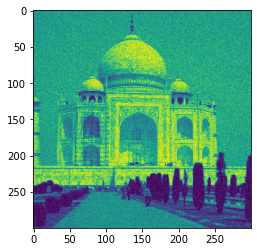

In [8]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img)

In [9]:
gray_img

array([[130, 121, 147, ..., 131, 113, 140],
       [134, 147, 117, ..., 135, 134, 153],
       [125, 146, 151, ..., 117, 122, 168],
       ...,
       [  5,  11,  17, ...,  44,  55,  33],
       [ 13,  30,  35, ...,  38,  53,  27],
       [ 28,  51,  55, ...,  60,  82,  61]], dtype=uint8)

To verify whether we have obtained Gray the scale image or not let’s check the shape of the image.


In [10]:
gray_img.shape

(300, 300)

As we can see from the shape there is no colour channel which means the image is on the grey colour scale. 

Now, let’s split various color channels of the image and we will see each channel one by one. First, we will see the green channel of the grey image.

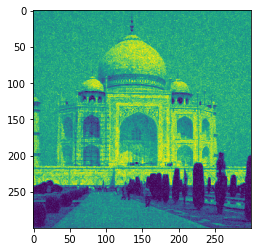

In [11]:
b, g, r = cv2.split(img)
img = cv2.merge((b,g,r))
plt.imshow(g)

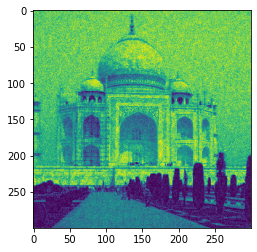

In [12]:
plt.imshow(b)

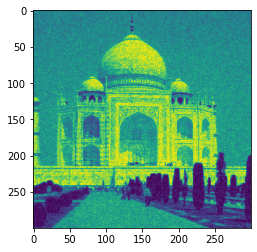

In [13]:
plt.imshow(r)

Now we will crop the image, this can be done by just slicing the image with respect to the pixel. 

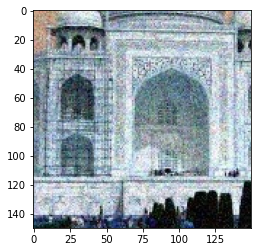

In [14]:
# Cropping
img3 = img[100:250, 50:200]
plt.imshow(img3)

In [15]:
img.shape

(300, 300, 3)

Also, there is another way to show a particular color channel or mixture of color channels of the image. In the below code we are setting all the pixels for the blue channel to zero where ultimately our image will have only two channels red and blue which looks like below. 

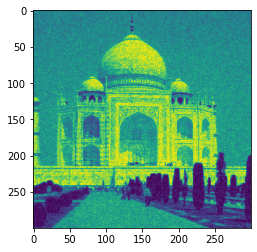

In [16]:
img1=img[:,:,2]
plt.imshow(img1)

In [17]:
# import numpy as np
# import cv2 as cv
# from matplotlib import pyplot as plt
# img = cv.imread('/content/cats image.jpeg')
# color = ('b','g','r')
# for i,col in enumerate(color):
#   histr = cv.calcHist([img],[i],None,[256],[0,256])
#   plt.plot(histr,color = col)
#   plt.xlim([0,256])
# plt.show()

Geographical operation

Now we will see some of the geographical operations like the rotation of images, image translation etc. Let’s first see how to rotate the given image. We are aiming to rotate the image on the central point about 45 degrees. To rotate the image we will be using open cv’s getRotationMatrix2D and warpAffine function

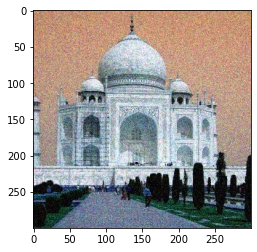

In [18]:
plt.imshow(img)

**Geographical operation**

Now we will see some of the geographical operations like the rotation of images, image translation etc. Let’s first see how to rotate the given image. We are aiming to rotate the image on the central point about 45 degrees. To rotate the image we will be using open cv’s getRotationMatrix2D and warpAffine function.

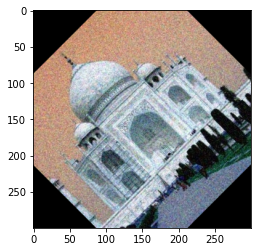

In [19]:
# Image rotation
height, width = img.shape[:2]
center = (width/2, height/2)

rotate_matrix = cv2.getRotationMatrix2D(center=center, angle=45, scale=1)
rotated_image = cv2.warpAffine(src=img, M=rotate_matrix, dsize=(width, height))
plt.imshow(rotated_image)

Now next is image translation, where will push the image diagonally down. 



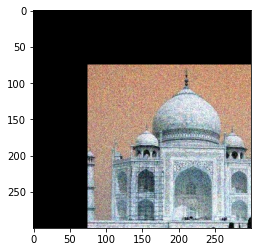

In [20]:
tx, ty = width / 4, height / 4

translation_matrix = np.array([
    [1, 0, tx],
    [0, 1, ty]
], dtype=np.float32)

translated_image = cv2.warpAffine(src=img, M=translation_matrix, dsize=(width, height))

plt.imshow(translated_image)

Edge detection 

Next, we will learn edge detection. Here we will use different types of algorithms for edge detection. First, we will use the Canny detection and then we will use the Sobel detection. 

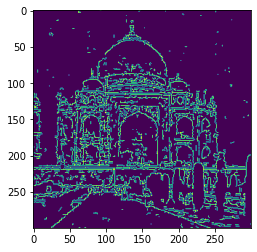

In [21]:
# Canny algorithm
edges = cv2.Canny(img,200,300,True)
plt.imshow(edges)

Sobel detection

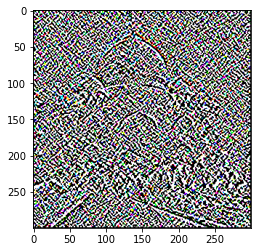

In [22]:
sobel_edge = cv2.Sobel(src=img, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection
# Display Sobel Edge Detection Images
plt.imshow(sobel_edge)

**Contour Detection** 

In this part of the implementation, we will learn to detect the contour in a given image. We need to first convert the image into a binary image then a suitable contour detection algorithm is applied to it.

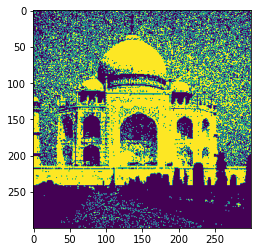

In [23]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Apply binary thresholding
ret, thresh = cv2.threshold(img_gray, 150, 255, cv2.THRESH_BINARY)
# visualize the binary image
plt.imshow(thresh)

Above we can see the binary form of the image. Now let’s use this image to create contour over it.

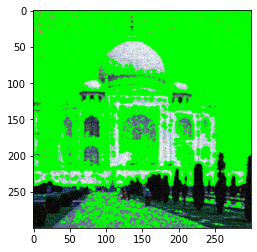

In [24]:
contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
cv2.drawContours(image=img, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)

# See the results
plt.imshow(img)

Above we can see how the contours have been generated. The contour has been generated well for both background and foreground objects.